This file is to price snowball by monte carlo simulation method and binomial tree method with forward shooting grid function.
The basic assumption about the snowball:
$$Notiontal amount(N):100\_000\_000,\ \ stock\ volatility(\sigma): 0.16,$$
$$risk\ free intetrest(r)=3\%,\ \ securities\ borrowing(q):9.5\%$$
$$knock-out\ coupon\ rate(kc)=16\%, \ \ coupon\ rate(c)=16\%$$
$$invest\ horizon/time(T):24(months),\ \ locked\ time(Tl)=3(months) $$
$$stepdown(s)=0.5\%,\ \ stepdown\ begin\ time(Ts)=4 $$
$$original\ knock-out\ barrier:100\%,\ \ knock-in\ barrier=75\%$$

For computing simplicity, I assume all intervals of knock-out day are the 1 month with 30/360 daily counting convention and
The interval can be divide into one day if necessary.


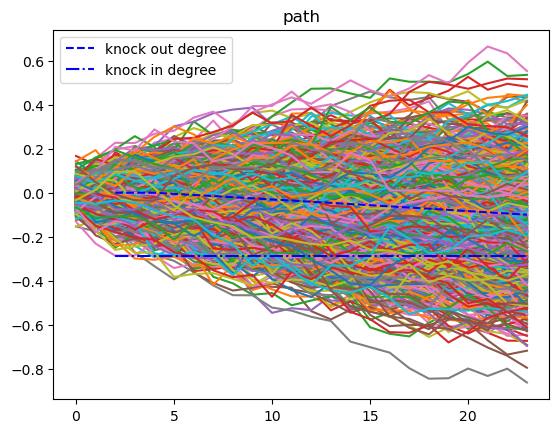

In [1]:
#monte carlo method 
import numpy as np
import matplotlib.pyplot as plt
#we denote the price level with log(S) to avoid time-costing logarithm comuptation\
#in monte carlo process
r=0.03;q=0.095;sigma=0.16;dt=1/12;T=2;N=100_000_000
knock_in=0.75;n=100000
#We use argmax to postion the index of knock/in event, if we only use 22 data, we cannot
#distinguish whether the first observation month encounter knock/in or knock/in no event happens in
#the full trail. First two observation months dont exist,so we set them to 100, 
#as impossible to knock out, so if knock/in event happens in the third observation month, argmax
#will return index 2; return 0 if no knock/in event happens.
knock_out_degree_array=np.array([*([100]*2),*([0]*22)],dtype=float)
knock_out_degree_array[-20:]=np.log(np.linspace(1,0.905,20))
path=np.random.randn(n,24)*sigma*np.sqrt(dt)+(r-q-0.5*sigma**2)*dt
path=path.cumsum(axis=1)

plt.plot(path[:min(1000,path.shape[0]),:].T)
plt.plot(range(2,24),knock_out_degree_array[-22:],'b--',label='knock out degree')
plt.plot(range(2,24),np.log(knock_in)*np.ones(22),'b-.',label='knock in degree')
plt.legend()
plt.title('path')
plt.show()

In [2]:
row_indices = np.arange(n)
arg_knockout=np.column_stack((row_indices,np.argmax(path[:,]>knock_out_degree_array,axis=1)))
arg_knockin=np.column_stack((row_indices,np.argmax(path[:,]<np.log(knock_in),axis=1)))
arg_knockout_indicatior=arg_knockout[:,1]>=2
arg_knockin_no_knockout_indicatior=(arg_knockout[:,1]<2)*(arg_knockin[:,1]>=2)
arg_no_knockin_no_knockout_indicatior=(arg_knockout[:,1]<2)*(arg_knockin[:,1]<2)
print("the trails that knockout happens:\t",arg_knockout_indicatior.sum())
print("the trails that knockin happens and no knockout happen:\t",arg_knockin_no_knockout_indicatior.sum())
print("the trails that no knockout and knockout happens:\t",arg_no_knockin_no_knockout_indicatior.sum())


the trails that knockout happens:	 75321
the trails that knockin happens and no knockout happen:	 21242
the trails that no knockout and knockout happens:	 3437


In [6]:
#knockout and no knockin
value_out=(arg_knockout[arg_knockout_indicatior,1]*dt*0.16).sum()
#no knockout and no knockin
value_noin_noout=arg_no_knockin_no_knockout_indicatior.sum()*2*0.16
#knock in and no knockout, similar to a put option 
array_in_noout=np.exp(path[arg_no_knockin_no_knockout_indicatior,-1])-1
value_in_noout=np.where(array_in_noout>-0,0,array_in_noout).sum()
print("pricing of snowball by monte carlo simulation:\t",(value_out+value_noin_noout+value_in_noout)/n*N)

pricing of snowball by monte carlo simulation:	 5363661.665092638
